Best Polynomial Degree: 3
Test MSE: 3.213966714701597


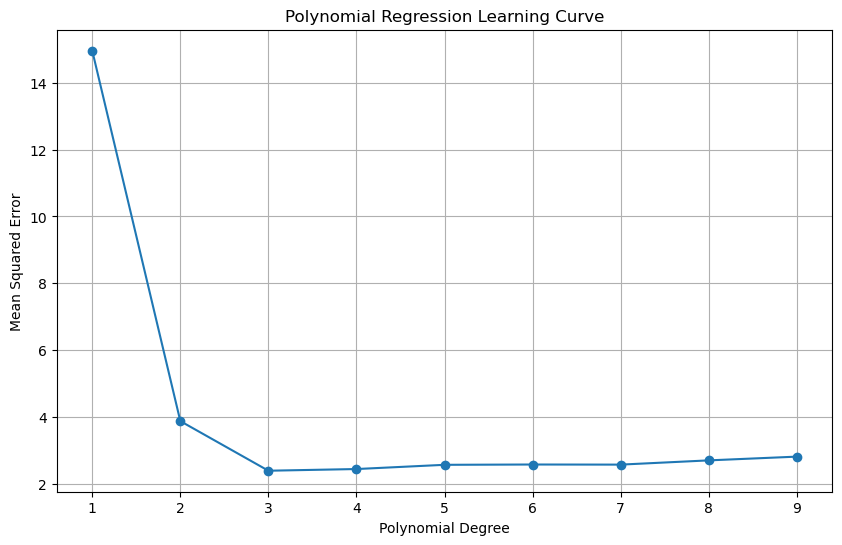

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline  # Import make_pipeline

# Generate the dataset
def generate_dataset(n=100, degree=1, noise=1, factors=None):
    x = np.random.uniform(low=-1, high=1, size=n)
    factors = np.random.uniform(0, 10, degree+1)
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    y += np.random.normal(-noise, noise, n)
    
    return x, y

# Load generated data
np.random.seed(0)
X, y = generate_dataset(n=100, degree=4, noise=1.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

# Create a parameter grid for polynomial degree
param_grid = {'polynomialfeatures__degree': np.arange(1, 10)}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model on the training data
grid_search.fit(X_train.reshape(-1, 1), y_train)

# Get the best polynomial degree
best_degree = grid_search.best_params_['polynomialfeatures__degree']

# Evaluate on the test set
y_pred = grid_search.predict(X_test.reshape(-1, 1))
test_mse = mean_squared_error(y_test, y_pred)

# Print the best degree and test performance
print(f'Best Polynomial Degree: {best_degree}')
print(f'Test MSE: {test_mse}')

# Plot learning curve
degrees = np.arange(1, 10)
mean_scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_scores, marker='o')
plt.title('Polynomial Regression Learning Curve')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


Best Polynomial Degree: 1
Test MSE: 4061.825928494928


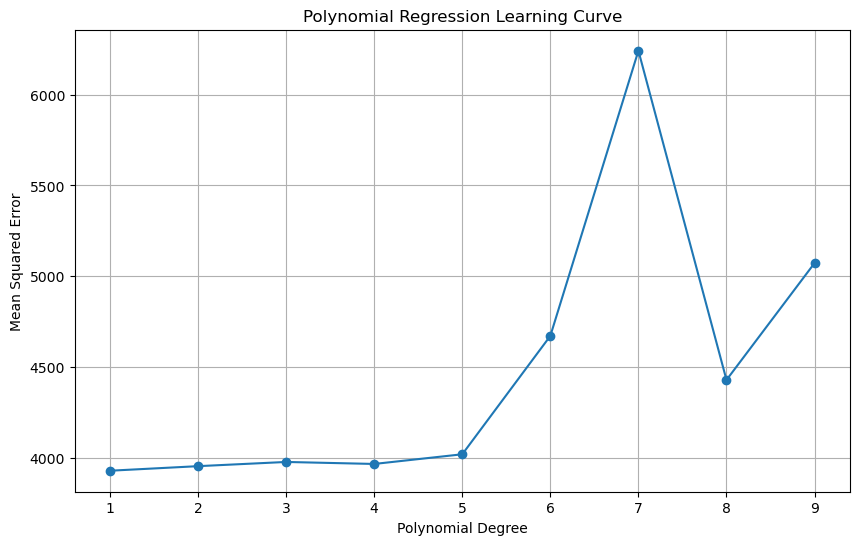

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline  # Import make_pipeline

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data[:, np.newaxis, 2], diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

# Create a parameter grid for polynomial degree
param_grid = {'polynomialfeatures__degree': np.arange(1, 10)}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best polynomial degree
best_degree = grid_search.best_params_['polynomialfeatures__degree']

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

# Print the best degree and test performance
print(f'Best Polynomial Degree: {best_degree}')
print(f'Test MSE: {test_mse}')

# Plot learning curve
degrees = np.arange(1, 10)
mean_scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_scores, marker='o')
plt.title('Polynomial Regression Learning Curve')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


High Bias Models which represents underfitting are defined by models with low polynomial degrees for example 1 or 2. Using a polynomial degree equal to 1 which means a straight line or a polynomial degree of 2 which means a simple curve to fit the data may not capture everything accurately. As the data has a certain degree of complexity, these models would be way to simple to represent everythin, resulting in underfitting. Therefore, they perform poorly on both the training and the test set.

On the other side, models with very high polynomial degrees like 6,7,8,9 are likey to have a high variance, fitting the data extremely well, even to the extent of fitting the noise. Therefore, they tend to perform exceptionally well on the training data but poorly on new, unseen data which is represented by the test set.

In conclusion, a model with moderate complexity ( a degree around 3 or 4) is likely to strike the best balance between bias and variance for this specific dataset.


Best Polynomial Degree: 1
Test MSE: 2900.1732878832295


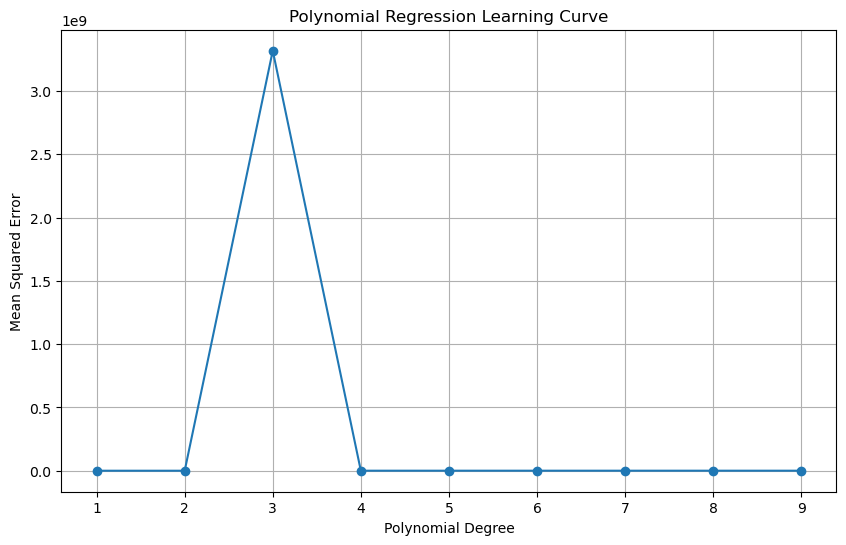

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target  # Use all features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

# Create a parameter grid for polynomial degree
param_grid = {'polynomialfeatures__degree': np.arange(1, 10)}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best polynomial degree
best_degree = grid_search.best_params_['polynomialfeatures__degree']

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

# Print the best degree and test performance
print(f'Best Polynomial Degree: {best_degree}')
print(f'Test MSE: {test_mse}')

# Plot learning curve
degrees = np.arange(1, 10)
mean_scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_scores, marker='o')
plt.title('Polynomial Regression Learning Curve')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
